In [31]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [4]:
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
type(mnist)

sklearn.utils._bunch.Bunch

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
x = mnist.data
y = mnist.target
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

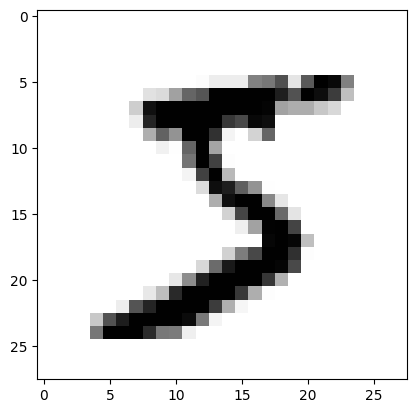

In [7]:
first = x[0]
image = first.reshape(28,28)
plt.imshow(image, cmap = 'binary')
plt.show()

In [8]:
y[0]

'5'

In [9]:
x[0]#below array the numbers which are non zero are considered as colour code

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [10]:
x_train,x_test = x[:6000],x[6000:]
y_train,y_test = y[:6000],y[6000:]

In [11]:
y_train

array(['5', '0', '4', ..., '8', '6', '9'], shape=(6000,), dtype=object)

In [12]:
y_train_5 = y_train == '5'
y_train_5

array([ True, False, False, ..., False, False, False], shape=(6000,))

In [16]:
#choosing a model SGDclassifier (stochastic gradient decendent)
sdg = SGDClassifier(max_iter=1000, tol= 0.01, random_state = 42)
sdg.fit(x_train, y_train_5) #fit method meaning training the model it require 2 things, data of training set and label

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.01
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [21]:
image_s = x_train[45]
sdg.predict([image_s])

array([False])

In [25]:
res=cross_val_score(sdg, x_train, y_train_5, cv =4, scoring= 'accuracy')#cv meaning number of folds
res

array([0.95666667, 0.96066667, 0.96      , 0.96866667])

In [27]:
rus= cross_val_predict(sdg, x_train, y_train_5, cv =4)
rus

array([ True, False, False, ..., False, False, False], shape=(6000,))

In [32]:
c= confusion_matrix(y_train_5, rus)
c

array([[5361,  125],
       [ 106,  408]])